## Q2

In [15]:
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [16]:
#client = pymongo.MongoClient("mongodb+srv://<concealed>@cluster0.5ffcs.mongodb.net/myFirstDatabase?retryWrites=true&w=majority")
db = client.sample_supplies

In [17]:
pipeline=[
    { "$project" : { "customer.age":1} } 
]
age=[]

In [18]:
for i in db['sales'].aggregate(pipeline):
    age.append(i["customer"]['age'])

In [19]:
age=pd.Series(age)

In [20]:
bins = [15,20,25,30,35,40,45,50,55,60,65,70,75,80]
labels = ['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80']
a=pd.cut(age,bins, labels = labels,right = False)

In [21]:
data=a.value_counts()

In [22]:
data.sort_index(inplace=True)

In [23]:
data

15-20    168
20-25    233
25-30    407
30-35    498
35-40    650
40-45    612
45-50    586
50-55    474
55-60    440
60-65    412
65-70    257
70-75    226
75-80     37
dtype: int64

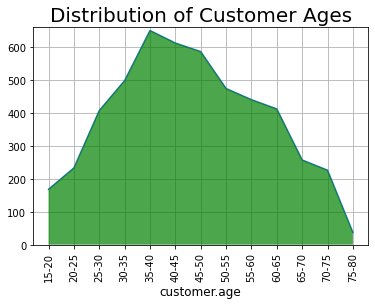

In [24]:
plt.plot(data)
plt.title("Distribution of Customer Ages", fontsize=20)
plt.xlabel("customer.age", fontsize=12)
plt.xticks(rotation=90)
plt.ylim((0, 660))
plt.grid(zorder=0)
plt.fill_between(x=range(13), y1=0, y2=data.values, facecolor='green', alpha=0.7,zorder=100)
plt.show()